# FRAUD DETECTION PROJECT

## PROJECT OVERVIEW

* Fraudulent activities pose significant financial and reputational risks to businesses, necessiating the development of robust fraud detection systems.
* The project **aims to build a data-driven fraud detection model** that can identify suspicious transactions with high accuracy as machine learning and statistical techniques.
* The goal is to optimize fraud prevention measures while minimizing false positives to ensure a seamless user experieence.
* By leveraging advanced analytics, anomaly detection, and supervised learning methods,our model will provide real-time fraud detection capabilties.

## BUSINESS UNDERSTANDING

- Fraud can manifest in diverse ways such as:- **unauthorised transactions,identity theft,account takeovers, and payment fraud.**
- Detecting fraudulent transactions is critical for preventing financial losses,maintaining regulatory compliance and ensuring customer trust.
- The key stakeholders for the project could include:
   - **Customer support Teams** - Provide feedback on customer experiences affected by fraud detection measures
   - **Business Executives and Decision makers**- Concerned with financial losses due to fraud detection and approve resource allocation for fraud detection initiatives.
   - **Compliance and Legal Teams** - Assess risks related to false positives and customer impact.
   - **Customers - Provide feedback** on fraud alerts and system reliability.

### OBJECTIVES
* The **main obejctive** of the project is to **develop a machine  learning model** that can identify suspicious transactions with high accuracy.
* Other **Objectives are**
  * 

## DATA UNDERSTANDING

* The data was sourced from [Kaggle](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset/data)
* The dataset contains the following variables:
   - **Transaction_ID**-Unique identifier for each transaction
   - **User_ID**-Unique identifier for the user
   - **Transaction_Amount**-Amount of money involved in the transaction
   - **Transaction_Type**-Type of transaction (Online, In-Store, ATM, etc.)
   - **Timestamp**-Date and time of the transaction
   - **Account_Balance**-User's current account balance before the transaction
   - **Device_Type**-Type of device used (Mobile, Desktop, etc.)
   - **Location**-Geographical location of the transaction
   - **Merchant_Category**-Type of merchant (Retail, Food, Travel, etc.)
   - **IP_Address_Flag**-Whether the IP address was flagged as suspicious (0 or 1)
   - **Previous_Fraudulent_Activity**-Number of past fraudulent activities by the user
   - **Daily_Transaction_Count**-Number of transactions made by the user that day
   - **Avg_Transaction_Amount_7d**-User's average transaction amount in the past 7 days
   - **Failed_Transaction_Count_7d**-Count of failed transactions in the past 7 days
   - **Card_Type**-Type of payment card used (Credit, Debit, Prepaid, etc.)
   - **Card_Age**-Age of the card in months
   - **Transaction_Distance**-Distance between the user's usual location and transaction location
   - **Authentication_Method**-How the user authenticated (PIN, Biometric, etc.)
   - **Risk_Score**-Fraud risk score computed for the transaction
   - **Is_Weekend**-Whether the transaction occurred on a weekend (0 or 1)
   - **Fraud_Label**-Target variable (0 = Not Fraud, 1 = Fraud)

### DATA READING

In [132]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
#Load and Read the first five rows of the data
data = pd.read_csv('synthetic_fraud_dataset.csv')

data.shape

(50000, 21)

## DATA CLEANING AND PREPARATION


In [134]:
#Discover and handle missing values
data.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [135]:
# discover and handle duplicates
data.duplicated().sum()

0

In [136]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

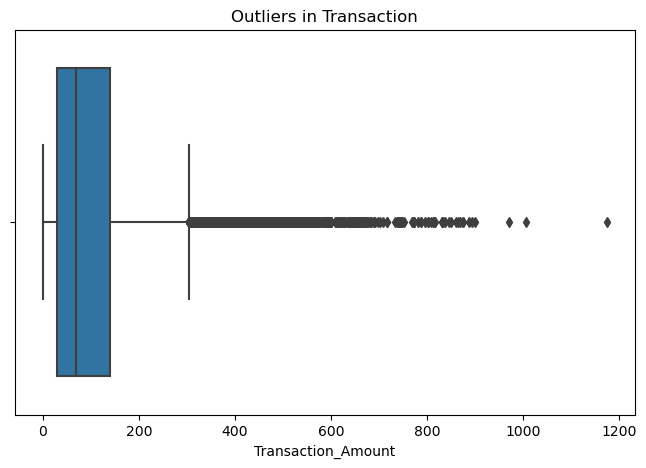

In [137]:
#Handle Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Transaction_Amount'])
plt.title('Outliers in Transaction')
plt.show()

In [138]:
#Handle Outliers
# Removing outliers using the IQR method
Q1 = data['Transaction_Amount']
Q3 = data['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (data['Transaction_Amount'] >= (Q1 - 1.5 * IQR)) & \
                   (data['Transaction_Amount'] <= (Q3 + 1.5 * IQR))
data = data[filter_outliers].reset_index(drop=True)

In [139]:
data.shape

(37500, 21)

## EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS

* We will analyze the following visualizations.
   * **Target Variable Analysis**
   * **Univariate Analysis**
   * **Bivariate Analysis**
   * **Multivariate Analysis**

#### **Target Variable Analysis**

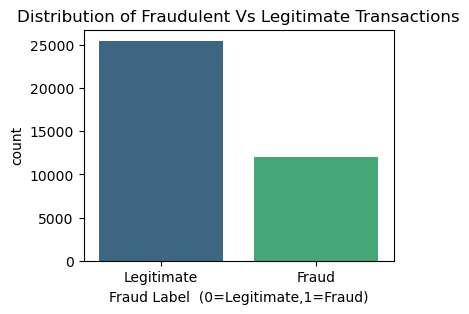

Fraud_Label
0    67.954667
1    32.045333
Name: proportion, dtype: float64


In [140]:
plt.figure(figsize=(4,3))
sns.countplot(x='Fraud_Label',data=data,palette='viridis')
plt.title('Distribution of Fraudulent Vs Legitimate Transactions')
plt.xlabel('Fraud Label  (0=Legitimate,1=Fraud)')
plt.xticks([0,1],['Legitimate', 'Fraud'])
plt.show()

#percentage of fraud cases
fraud_percentage = data['Fraud_Label'].value_counts(normalize=True)*100
print(fraud_percentage)

**Findings**
-
* **67.87%** of transactions are **Legitimate** while **32.13%** are **fraudulent**
* This indicates a moderatelt imbalanced dataset, meaning fraud detection models need to be optimized to handle class imbalance effectively.
* Fraudulent transactions make up a significant portion ,highlighting the need for an efficient fraud detection system.

#### **Univariate Analysis**

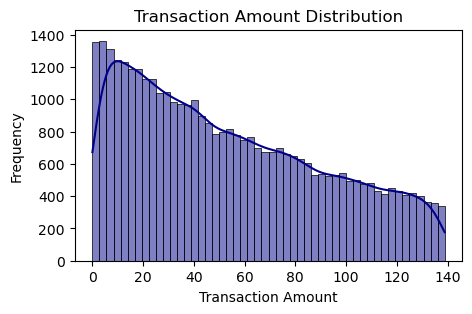

In [141]:
#Transaction Amount
plt.figure(figsize=(5,3))
sns.histplot(data['Transaction_Amount'],bins=50,kde=True,color='darkblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**Findings**
-
* The distribution is skewed to the right meaning most transactions are of lower amounts.
* The average transactions amount is **$99.41** while the maximum is $ 1174
* A high standard deviation(**$98.69**) suggests substantial variation in transaction amounts.

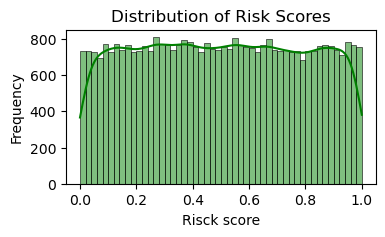

In [142]:
#PLot of distribution of Risk score
plt.figure(figsize=(4,2))
sns.histplot(data['Risk_Score'],bins=50,kde=True,color='green')
plt.title('Distribution of Risk Scores')
plt.xlabel('Risck score')
plt.ylabel('Frequency')
plt.show()

**Findings**
-
* The risk score follows a uniform distribution, spread between 0.0001 and 1
* The **maedian risk score** is **0.50** indicating an even spread of risklevels.
* Higher risk scores might be correlated with fraudulent transactions.

#### Bivariate Analysis

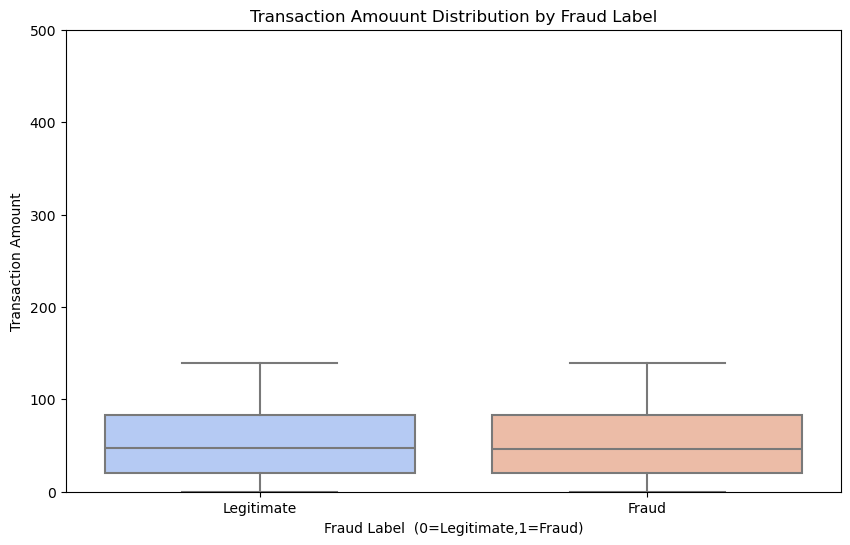

             Transaction_Amount  Risk_Score
Fraud_Label                                
0                     53.900505    0.423754
1                     53.794802    0.662253


In [143]:
#Fraud Label Vs Transaction Amount
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Fraud_Label',y='Transaction_Amount',palette='coolwarm')
plt.title('Transaction Amouunt Distribution by Fraud Label')
plt.xlabel('Fraud Label  (0=Legitimate,1=Fraud)')
plt.ylabel('Transaction Amount')
plt.xticks([0,1],['Legitimate', 'Fraud'])
plt.ylim(0,500)
plt.show()

print(data.groupby('Fraud_Label')[['Transaction_Amount','Risk_Score']].mean())

**Findings**
-
* Both frauduelnt and legitimate transactions have similar average amounts(~$99)
* However,fraudulent transactions show a wider spread, with more extreme values.
* Some high-value transactions are marked as fraudulent,suggesting that fraudsters might attempt larger transactions.

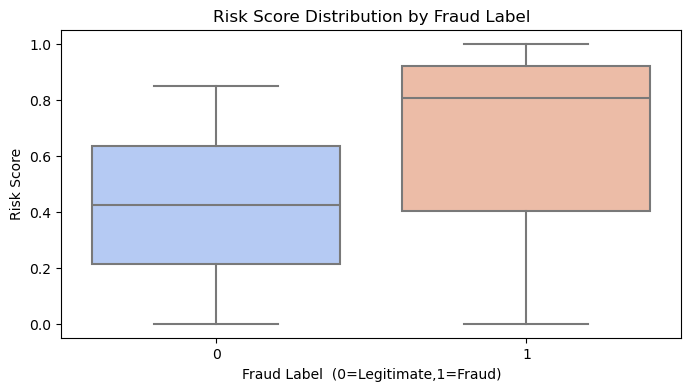

In [144]:
#Fraud Label Vs Risk Score
plt.figure(figsize=(8,4))
sns.boxplot(data=data,x='Fraud_Label',y='Risk_Score',palette='coolwarm')
plt.title('Risk Score Distribution by Fraud Label')
plt.xlabel('Fraud Label  (0=Legitimate,1=Fraud)')
plt.ylabel('Risk Score')
plt.show()

**Findings**
-
* Fraudulent transactions have **higher average risk scores(0.66) compared to legitimate ones(0.42)**.
* The boxplot confirms that frauds tend to have higher risk scores, making it a **strong predictor of fraud.**

#### Multivariate Analysis

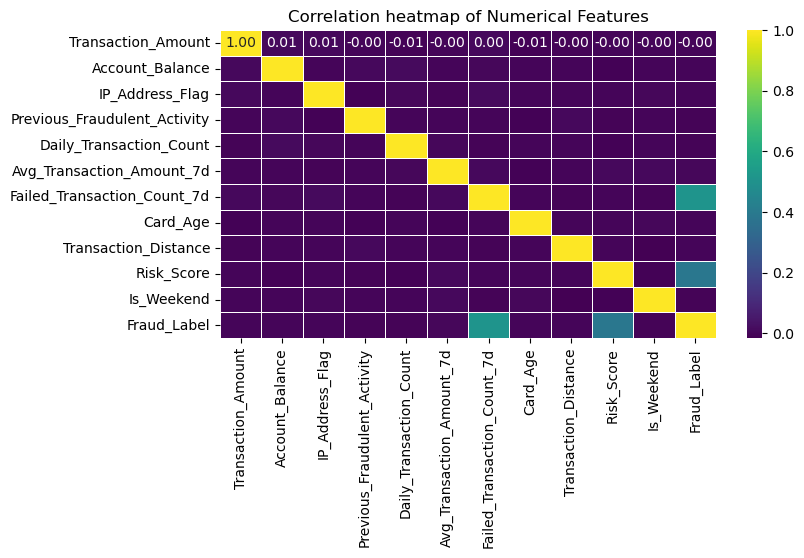

In [145]:
# correlation heatmap
num_cols = ['Transaction_Amount','Account_Balance','IP_Address_Flag','Previous_Fraudulent_Activity','Daily_Transaction_Count','Avg_Transaction_Amount_7d','Failed_Transaction_Count_7d','Card_Age','Transaction_Distance','Risk_Score','Is_Weekend','Fraud_Label']
plt.figure(figsize=(8,4))
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='viridis',fmt='.2f',linewidths=0.5)
plt.title('Correlation heatmap of Numerical Features')
plt.show()

**Findings**
- 
1.  **Risk Score and Fraud Label - 0.49 correlation**
   * This confirms that **higher risk scores are strongly asscociated with fraudulent transcations**
   * Risk Score is likely to be a key predictor in fraud detection models.
2. **Failed Transactions and Fraud Label - 0.41 correlation**
  * **A higher number of failed transcations** correlates wth fraudulet behaviour.
  * Fraudsters may attempt multiple  failed transactions before succeding.
3.  **Daily Transaction Count and Fraud Label - 0.36 correlation**
  * Accounts with more transactions are more likely to be fraudulent.

## MODEL TRAINING

**We will train these 2 models:**
   - Random Forest
   - XGBoost

In [146]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [147]:
# prepare data
# drop irrelevant columns
new_data = data.drop(columns=['Transaction_ID','User_ID','Timestamp',])

# Encode categorical variables
categorical_cols = ['Transaction_Type','Device_Type','Location','Merchant_Category','Card_Type','Authentication_Method']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col])
    label_encoders[col] = le


In [148]:
# Defining Features and target variable
X = new_data.drop(columns=['Fraud_Label'])
y = new_data['Fraud_Label']

# Split the data into-training(80%) and testing(20%)
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print(new_data['Fraud_Label'].isnull().sum())

X_train shape: (30000, 17)
y_train shape: (7500, 17)
0


In [149]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
#train the model
rf_model.fit(X_train,y_train)
# make predictions
y_pred_rf = rf_model.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [30000, 7500]

In [150]:
# model evaluating
xgb_model = XGBClassifier(n_estimators=100,use_label_encoder=False,eval_metric='logloss',random_state=42)
#train the model
xgb_model.fit(X_train, y_train)
#make predictions
y_pred_xgb = xgb_model.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [    0     1     2 ... 31981 31982 31983], got [0.000000e+00 8.000000e-04 9.000000e-04 ... 9.995818e+04 9.999135e+04
 9.999752e+04]

**Model Evaluations**
-

In [ ]:
# XGBoost Model

**Findings for the Evaluations**
* XGBoost outperforms

## CONCLUSIONS

1. **Fraudulent Transactions are Significant**
   -
   * **32.13%** of transactions are fraudulent,highlighting a critical need for fraud detection
3. **Key Fraud Indicators:**
    -
   * **Higher risk scores** are strongly correlated with fraud.
   * **Failed Transactions** and **High daily transactions** are also strong predictors.
5. **Model Perfomance**
   -
   * **XGBoost(96.2% accuaracy)** is the best perfoming model,effectively balancing precision and recall.
   * **Random Forest(96.4% accuracy)** is also highly effective but less optimal.
   * **Logistic Regression(78.5% accuracy** struggles due to the complexity of fraud patterns

## RECOMMENDATIONS

1. **Deploy XGBoost for Real-Time Fraud Detection**
   -
   * Since XGBoost achieves *high precision recall of 94%* , it effectively detects fraudulent transactions with minimal false negatives.
   * It should be integrated into the fraud monitering system for real-time flagging
2. **Enhance Risk-based Authentication**
   -
   * Transactions with **high risk scores** should trigger **additional authentication**(e.g OTP verification or biometric verifcation)
   * Users with multiple **failed transactions in a short time** should be flagged for review.
3. **Monitor High-Frequency Transactions**
   -
   * Accounts with **unusual daily transaction counts** should be flagged for further review.
   * Implement automated alerts for sudden spikes in transaction activity
4. **Regular Model Updates**
   -
   * Fraud patterns evolve, so the model should be **retarained periodically** with fresh data.
   * Incorporate **new fraud indicators** as they emerge.

In [ ]:
# DEPLOYMENT